loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Custom COCO categories: 
obj_1 obj_2

Custom COCO supercategories: 
particles


0

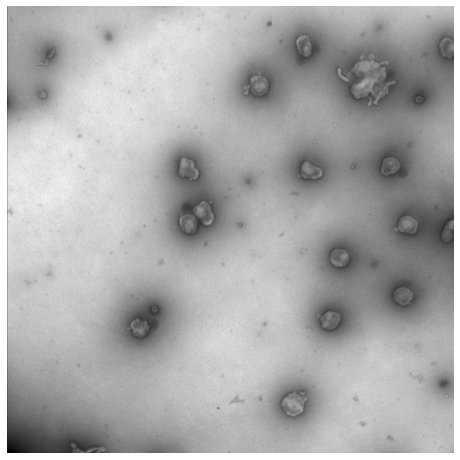

In [4]:
# %matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab


image_directory = './data/MuLV/gray/'
annotation_file = './data/MuLV/Vironova_Cell_Seg_2021.json'
example_coco = COCO(annotation_file)


categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))



category_ids = example_coco.getCatIds(catNms=['square'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]


# image_data

# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd='crowd')
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

In [79]:
x = []
np.random.seed(0)
for i in range(5):
    x.append( np.random.randint(-10,20,size=(3,1)))

print(x[0])
X = np.concatenate([xi for xi in x],axis=1)
xx = x[0] @ x[0].T
print('xx',xx)
# print(X)

print(x[1].shape,'\n',X)
# S = x[1] @ x[1].T
# S = np.mean([x_s @ x_s.T for x_s in x])
# s = [x_s @ x_s.T for x_s in x]
# maee = np.sum(s)
# sm = (s[0]+s[1]+s[2]+s[3]+s[4])/5
# print(sm)
# S = X @ X.T * (1/5) 
# # print(s)
# print(S)
# print(np.allclose(sm,S))
X_centered = X - np.mean(X, axis=1, keepdims=True)
print(X_centered,'\n',np.mean(X, axis=1))

U, S, Vt = np.linalg.svd(X_centered.T)
# u2, s2 , vt2 = np.linalg.svd(X_centered)
# print(S,'\n', U ,'\n', Vt)
# print(np.allclose(U,vt2.T))
Z = X_centered.T @ Vt[:,:2]
R = np.mean(X.T, axis=0, keepdims=True) + Z @ Vt[:2, :]
cons_err = ((R - Z)**2).sum(axis=1)


[[ 2]
 [ 5]
 [11]]
xx [[  4  10  22]
 [ 10  25  55]
 [ 22  55 121]]
(3, 1) 
 [[  2 -10  -7   9  -6]
 [  5  -7  -3  11  13]
 [ 11  17  -1   8  -4]]
[[  4.4  -7.6  -4.6  11.4  -3.6]
 [  1.2 -10.8  -6.8   7.2   9.2]
 [  4.8  10.8  -7.2   1.8 -10.2]] 
 [-2.4  3.8  6.2]
[22.19035174 17.42318952  6.69483057] 
 [[-0.02346888  0.37874579  0.02241333 -0.72017572  0.58038384]
 [ 0.75517574  0.12006321  0.36116269  0.36419358  0.39015251]
 [ 0.16453058 -0.52490135 -0.70490292  0.05481138  0.44442755]
 [-0.432826    0.54515266 -0.23967736  0.57759583  0.35271527]
 [-0.46341144 -0.51906031  0.56100427  0.1099488   0.43475477]] 
 [[-0.44457946 -0.75179525  0.48698359]
 [ 0.64580051  0.10772343  0.75586861]
 [-0.62071797  0.65053791  0.43761813]]
True


In [82]:
print((X**2).shape) 
print((X**2)) 
print(x[0]**2)

(3, 5)
[[  4 100  49  81  36]
 [ 25  49   9 121 169]
 [121 289   1  64  16]]
[[  4]
 [ 25]
 [121]]


In [85]:
print(X.T**2)

[[  4  25 121]
 [100  49 289]
 [ 49   9   1]
 [ 81 121  64]
 [ 36 169  16]]
